# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 2. Preprocessing

### 2.1  project_subject_categories

In [4]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [5]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

In [6]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [7]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 2.2 project_subject_subcategories¶

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [9]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

In [10]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [11]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


### 2.3 Project Essay

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:32<00:00, 1523.95it/s]


In [20]:
# after preprocesing
preprocessed_essay[20]

'the students school come diverse backgrounds varied experiences over 90 students come considerable poverty this year 100 students district receive free lunches due poverty rate community some students well grade level need enrichment students limited experiences literacy writing vocabulary need work basic skills these differences within class make difficult ensure students getting specifically need daily basis each week students love visiting school library borrowing book week a new carpet library would create cozy place students sit librarian reading book week this would also help brighten library make exciting place students while librarian the carpet i requested designated spaces students sit helping manage behavior also your donation would provide bright colorful carpet library story area librarians teachers volunteers come share stories students first second grade students sharing books listening stories important child development children need know reading important no better w

In [21]:
len(preprocessed_essay)

50000

In [22]:
project_data['preprocessed_essay']=preprocessed_essay
project_data.drop(['essay'], axis=1, inplace=True)

### 2.4 Project title Text

In [23]:
# printing some project title.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[1079])
print("="*50)



Swim For Life At YMCA!
Alternative Seating for Comfy Classrooms
Hands on Art : Eric Carle


In [24]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title .append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 34725.76it/s]


In [25]:
preprocessed_project_title[170]

'alternative seating comfy classrooms'

In [26]:
project_data['preprocessed_project_title'] = preprocessed_project_title

In [27]:
project_data.drop(['project_title'], axis=1, inplace=True)

### 2.5 Price

In [28]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id  quantity   price
0  p000001         7  459.56
1  p000002        21  515.89

In [30]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 2.6 Number of words in the combine essays

In [31]:
essay_word_count = []
for essay in project_data['preprocessed_essay'] :
    e = len(essay.split())
    essay_word_count.append(e)

In [32]:
project_data['essay_word_count']= essay_word_count 

### 2.7 Number of words in the Project Title

In [33]:
title_word_count = []
for title in project_data['preprocessed_project_title'] :
    e = len(title.split())
    title_word_count.append(e)

In [34]:
project_data['Title_word_count']= title_word_count 

In [35]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   
2  The students on the campus come to school know...             NaN  ...   
3  My students live in high poverty conditions wi...             NaN  ...   
4  For many students, math is a subject that does...             NaN  ...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   
3                                            4                   1   
4                                            1                   1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                  preprocessed_essay  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                        preprocessed_project_title quantity   price  \
0        educational support english learners home       23  154.60   
1                 wanted projector hungry learners        1  299.00   
2  soccer equipment awesome middle school students       22  516.85   
3                           techie kindergarteners        4  232.90   
4                           interactive math tools        4   67.98   

   essay_word_count  Title_word_count  
0               161                 5  
1               109                 4  
2               202                 6  
3               121                 2  
4               122                 3  

[5 rows x 22 columns]

## 3.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'], random_state=32)


In [37]:
X_train.shape

(37500, 22)

In [38]:
y_train.shape

(37500,)

In [39]:
X_test.shape

(12500, 22)

In [40]:
y_test.shape

(12500,)

In [41]:
X_test.shape

(12500, 22)

In [42]:
X_train.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15711       43429  p169894  39a1994529fa4398f75ce4403a4e201f           Mrs.   
31878        4577  p210531  424819801de22a60bba7d0f4354d0258            Ms.   
15876      104415  p224401  82bb971f746edaf008d15291ff77a445            Ms.   
37141      172689  p244189  b41115c9e8f96a8a27ed3bf921a8a429           Mrs.   
38963       34496  p212133  b75f43506650e3caa34bf9a5cbf483ee           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
15711           SC        2017-01-31 11:09:35             Grades 3-5   
31878           MA        2016-08-21 21:23:38          Grades PreK-2   
15876           CO        2017-04-17 22:11:10          Grades PreK-2   
37141           WA        2016-09-08 00:00:52             Grades 3-5   
38963           UT        2016-08-22 17:08:51             Grades 3-5   

                                         project_essay_1  \
15711  Today's classroom is continually changing.  I ...   
31878  My students are my babies...I want the world f...   
15876  I love Room 113, our school's K-3 autism cente...   
37141  Our students are high-poverty, high-needs, and...   
38963  The students at my school come from various ba...   

                                         project_essay_2 project_essay_3  ...  \
15711  We have transitioned to a flexible seating cla...             NaN  ...   
31878  My Project\r\n\r\nBudget cuts are everywhere, ...             NaN  ...   
15876  More and more learning is done online. Forget ...             NaN  ...   
37141  Learning to play piano builds many different t...             NaN  ...   
38963  Coming back to school is difficult for many st...             NaN  ...   

      teacher_number_of_previously_posted_projects project_is_approved  \
15711                                            2                   1   
31878                                           10                   1   
15876                                            0                   1   
37141                                          129                   1   
38963                                           23                   1   

                     clean_categories          clean_subcategories  \
15711                    Math_Science  AppliedSciences Mathematics   
31878  Literacy_Language Math_Science         Literacy Mathematics   
15876  Literacy_Language SpecialNeeds        Literacy SpecialNeeds   
37141                      Music_Arts         Music PerformingArts   
38963                   Health_Sports           NutritionEducation   

                                      preprocessed_essay  \
15711  today classroom continually changing i work la...   
31878  my students babies i want world i teach three ...   
15876  i love room 113 school k 3 autism center when ...   
37141  our students high poverty high needs highly ca...   
38963  the students school come various backgrounds t...   

                   preprocessed_project_title quantity   price  \
15711          refresh our flexible classroom       18  112.75   
31878  please help with basic school supplies       15  101.47   
15876      set us free with little technology        2  429.00   
37141      two piano keyboards young learners        2  299.99   
38963              help our plates be healthy       15  345.25   

       essay_word_count  Title_word_count  
15711               165                 4  
31878               125                 6  
15876               170                 6  
37141               125                 5  
38963               157                 5  

[5 rows x 22 columns]

## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Numerical features

##### A. Price

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(price_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train_data = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 299.1888226666667
Standard deviation :375.41611545821604


In [44]:
price_standardized_test_data = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

##### B . Number of Previously Proposed Projects by the Teacher

In [45]:
previous_projects = StandardScaler()
previous_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

print("Mean : {}".format(previous_projects.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(previous_projects.var_[0])))

previous_projects_standardized_train_data = previous_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))



Mean : 11.268453333333333
Standard deviation :28.29868335231321


In [46]:
previous_projects_standardized_test_data = previous_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


##### C. Quantity

In [47]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(quantity_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train_data = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean : 17.064533333333333
Standard deviation :26.97188947989287


In [48]:
quantity_standardized_test_data = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

##### D. Title Word Count Feature

In [49]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

Title_Word_Count_scalar = StandardScaler()
Title_Word_Count_scalar.fit(X_train['Title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(Title_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(Title_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Title_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['Title_word_count'].values.reshape(-1, 1))
Title_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['Title_word_count'].values.reshape(-1, 1))

Mean : 4.337893333333334
Standard deviation :1.7822349532601538


##### E. Essay Word Count Feature

In [50]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay_Word_Count_scalar = StandardScaler()
essay_Word_Count_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(essay_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(essay_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Essay_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))
Essay_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))

Mean : 151.13178666666667
Standard deviation :38.761228295052206


### 4.2  Vectorizing Categorical data

#### A. Project Categories

In [51]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())
feature_Project_Categories = vectorizer.get_feature_names()


categories_one_hot_train_data = vectorizer.transform(X_train['clean_categories'].values)


['Literacy_Language', 'SpecialNeeds', 'Warmth', 'Health_Sports', 'Care_Hunger', 'History_Civics', 'AppliedLearning', 'Music_Arts', 'Math_Science']


In [52]:
# we use count vectorizer to convert the values into one hot encoded features
categories_one_hot_test_data = vectorizer.transform(X_test['clean_categories'].values)


#### B. Project Sub-Categories¶

In [53]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())
feature_Project_sub_Categories = vectorizer.get_feature_names()

sub_categories_one_hot_train_data = vectorizer.transform(X_train['clean_subcategories'].values)


['Literacy', 'NutritionEducation', 'CommunityService', 'VisualArts', 'EnvironmentalScience', 'Care_Hunger', 'Other', 'ESL', 'Music', 'Gym_Fitness', 'FinancialLiteracy', 'Economics', 'ParentInvolvement', 'TeamSports', 'Warmth', 'Health_Wellness', 'History_Geography', 'College_CareerPrep', 'PerformingArts', 'SpecialNeeds', 'ForeignLanguages', 'Mathematics', 'Literature_Writing', 'AppliedSciences', 'SocialSciences', 'Extracurricular', 'Civics_Government', 'CharacterEducation', 'EarlyDevelopment', 'Health_LifeScience']


In [54]:
# we use count vectorizer to convert the values into one hot encoded features
sub_categories_one_hot_test_data = vectorizer.transform(X_test['clean_subcategories'].values)


#### C. School State

##### c.1 On train data

In [55]:
#One Hot Encode - school_state
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1])) 


In [56]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())
feature_schol_state=vectorizer.get_feature_names()


school_state_one_hot_train_data = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train_data.shape)

['IL', 'CT', 'NC', 'ID', 'ND', 'WA', 'PA', 'GA', 'VA', 'SC', 'MI', 'OR', 'MO', 'RI', 'VT', 'NM', 'ME', 'CA', 'MD', 'HI', 'NE', 'UT', 'FL', 'NV', 'KY', 'IA', 'AR', 'IN', 'MS', 'NY', 'WV', 'MN', 'AZ', 'OK', 'SD', 'DE', 'CO', 'DC', 'OH', 'NJ', 'LA', 'KS', 'AL', 'WY', 'TN', 'AK', 'WI', 'NH', 'TX', 'MA', 'MT']
Shape of matrix after one hot encodig  (37500, 51)


##### c.3 On test data

In [57]:
# we use count vectorizer to convert the values into one hot encoded features

school_state_one_hot_test_data  = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test_data .shape)

Shape of matrix after one hot encodig  (12500, 51)


#### D. Project Grade Category

In [58]:
#One Hot Encode - Project Grade Category
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.replace('Grades',' ').split())

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))    

In [59]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())
feature_project_grade=vectorizer.get_feature_names()

project_grade_category_one_hot_train_data = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train_data.shape)

['9-12', '3-5', '6-8', 'PreK-2']
Shape of matrix after one hot encodig  (37500, 4)


In [60]:
# we use count vectorizer to convert the values into one hot encoded features
project_grade_category_one_hot_test_data = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (12500, 4)


#### E. Teacher Prefix

In [61]:
#One Hot Encode - Teacher Prefix
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    word = str(word)
    my_counter.update(word.replace('.',' ').replace('nan',' ').split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict= dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))  

In [62]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())
feature_teacher_prefix=vectorizer.get_feature_names()

teacher_prefix_one_hot_train_data = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train_data.shape)

['Dr', 'Mrs', 'Teacher', 'Ms', 'Mr']
Shape of matrix after one hot encodig  (37500, 5)


In [63]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features

teacher_prefix_one_hot_test_data = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (12500, 5)


## 4.3 Vectorizing Text data

### 4.3.1  Bag of words on preprocessed essays  with bi-grams with min_df=10 and max_features=5000

In [64]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
preprocessed_essays_train_bow = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_train_bow))
print("the number of unique words ", preprocessed_essays_train_bow.get_shape()[1])
feature_bow_essay=vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (37500, 5000)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  5000


In [65]:
preprocessed_essays_test_bow = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_test_bow))
print("the number of unique words ", preprocessed_essays_test_bow.get_shape()[1])


Shape of matrix after one hot encodig  (12500, 5000)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  5000


### 4.3.2 Bag of Words on project_title with bi-grams with min_df=10 and max_features=5000

In [66]:
# We are considering only the words which appeared in at least 5 project title.
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
preprocessed_project_title_train_bow = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_train_bow))
print("the number of unique words ", preprocessed_project_title_train_bow.get_shape()[1])
feature_bow_project_title=vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (37500, 1222)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1222


In [67]:
preprocessed_project_title_test_bow = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_test_bow))
print("the number of unique words ", preprocessed_project_title_test_bow.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 1222)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1222


### 4.3.3TFIDF vectorizer preprocessed essays with bi-grams with min_df=10 and max_features=5000

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
essay_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("the number of unique words ", essay_tfidf_train.get_shape()[1])
feature_tfidf_essay=vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (37500, 5000)
the number of unique words  5000


In [69]:
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)
print("the number of unique words ", essay_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 5000)
the number of unique words  5000


### 4.3.4 TFIDF Vectorizer on project_title  with bi-grams with min_df=10 and max_features=5000

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
project_title_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_train.shape)
print("the number of unique words ", project_title_tfidf_train.get_shape()[1])
feature_tfidf_project_title=vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (37500, 1222)
the number of unique words  1222


In [71]:
project_title_tfidf_test = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_test.shape)
print("the number of unique words ", project_title_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 1222)
the number of unique words  1222


### 4.3.5 Using Pretrained Model AVG W2V on  essays

In [72]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [73]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    sent_vectors_train.append(vector)

print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████| 37500/37500 [00:13<00:00, 2789.41it/s]

37500
300


In [74]:
# average Word2Vec on Test DATA
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    sent_vectors_test.append(vector)

print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████| 12500/12500 [00:04<00:00, 2776.57it/s]

12500
300


### 4.3.6 Using Pretrained Model AVG W2V on project_title

In [75]:
# average Word2Vec on Train DATA
# compute average word2vec for each review.
title_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    title_vectors_train.append(vector)

print(len(title_vectors_train))
print(len(title_vectors_train[0]))

100%|██████████| 37500/37500 [00:00<00:00, 55661.90it/s]

37500
300


In [76]:
# average Word2Vec on Test DATA
# compute average word2vec for each review.
title_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    title_vectors_test.append(vector)

print(len(title_vectors_test))
print(len(title_vectors_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 52353.46it/s]

12500
300


### 4.3.7 Using Pre-Trained TFIDF weighted W2v on Project Essays

In [77]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|██████████| 37500/37500 [01:15<00:00, 496.39it/s]

37500
300


In [79]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|██████████| 12500/12500 [00:25<00:00, 494.88it/s]

12500
300


### 4.3.8 Using Pretrained Model TFIDF weighted W2v on Project Title

In [80]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|██████████| 37500/37500 [00:01<00:00, 23664.25it/s]

37500
300


In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 19474.63it/s]

12500
300


# Assignment 8: Logistic Regression

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

## 8.1  Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [83]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

In [84]:
bow_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,preprocessed_essays_train_bow,preprocessed_project_title_train_bow))
bow_train=bow_train.tocsr()

In [85]:
bow_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,preprocessed_essays_test_bow,preprocessed_project_title_test_bow))
bow_test=bow_test.tocsr()

In [86]:
print("Final Shape of the Data matrix")
print(bow_train.shape, y_train.shape)

print(bow_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 6323) (37500,)
(12500, 6323) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value using Grid Search CV

-- Grid Parameter Search via 3-fold CV
{'max_depth': 10, 'min_samples_split': 500}


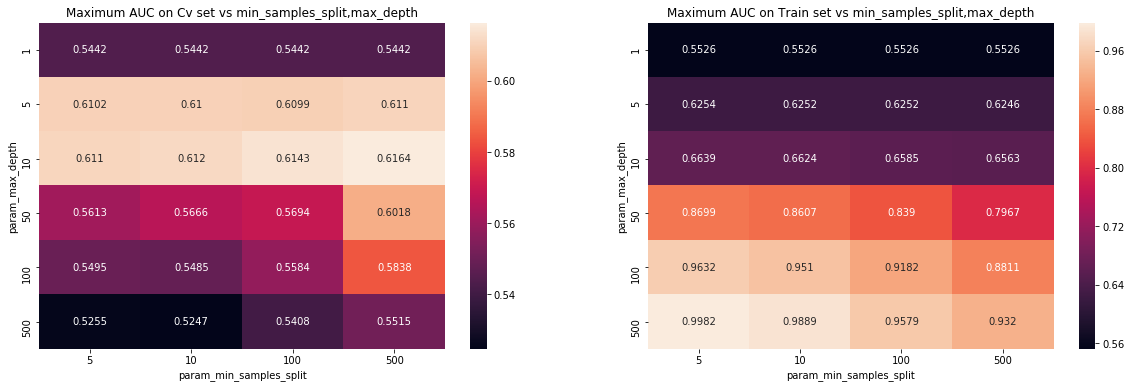

In [87]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              "min_samples_split": [5,10,100,500],
              "max_depth": [1, 5, 10, 50, 100, 500, 100]
              
              }

dt = DecisionTreeClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(bow_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 
                                    'param_max_depth','param_min_samples_split']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B. Train model using the best hyper-parameter value

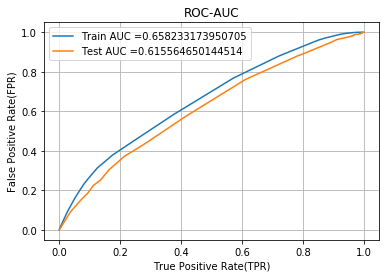

In [89]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(bow_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(bow_train)[:,1]
y_test_scores= model.predict_proba(bow_test)[:,1]
y_test_pred= model.predict(bow_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

#### With Class Balancing

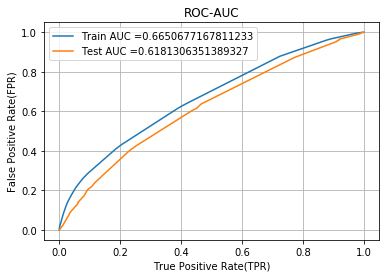

In [90]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')

model.fit(bow_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(bow_train)[:,1]
y_test_scores= model.predict_proba(bow_test)[:,1]
y_test_pred= model.predict(bow_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

###  8.1.2 Graphviz visualization of Decision Tree on BOW, SET 1

In [88]:
features_names = []
features_names.append("price")
features_names.append("prev_proposed_projects")



    
for a in feature_Project_Categories :
    features_names.append(a)
    
for a in feature_Project_sub_Categories :
    features_names.append(a)
    
for a in feature_schol_state :
    features_names.append(a)
    
for a in feature_project_grade :
    features_names.append(a)

for a in feature_teacher_prefix :
    features_names.append(a)
    
for a in feature_bow_essay :
    features_names.append(a)

for a in feature_bow_project_title :
    features_names.append(a)

In [89]:
len(features_names)

6323

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(bow_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

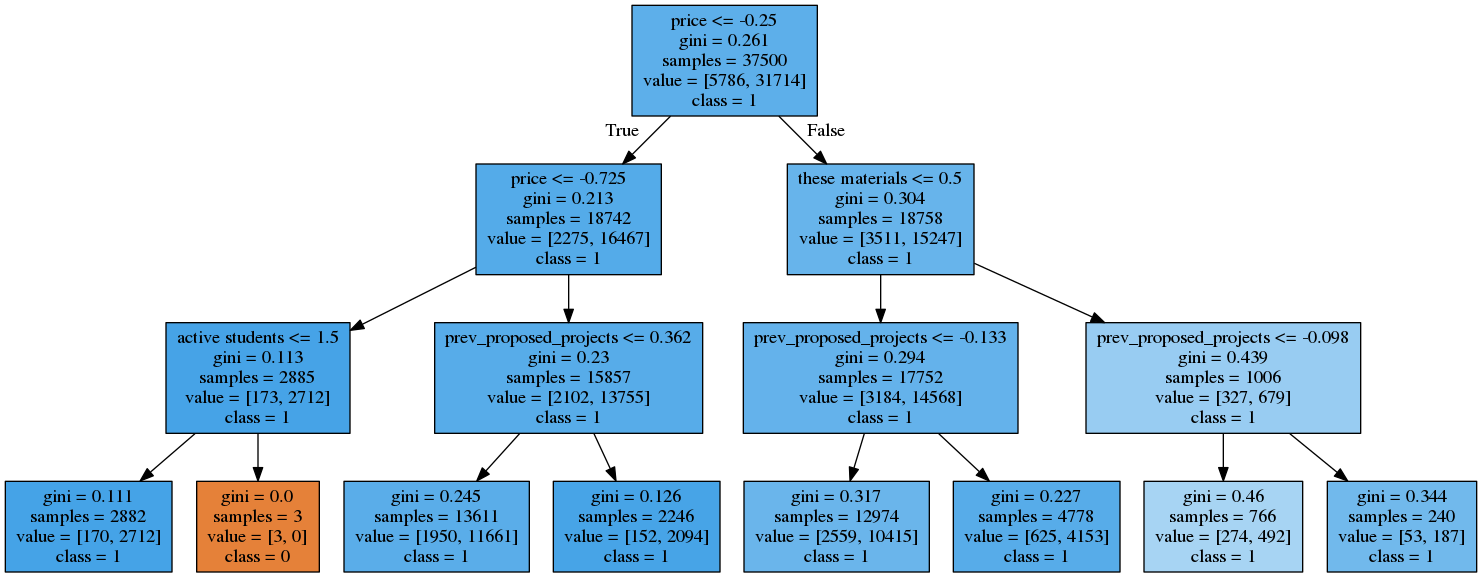

In [93]:
##https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=features_names, class_names=['0', '1'] 
   , filled = True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
#display(SVG(graph.pipe(format='svg')))




### c) Confusion Matrix

#### Train Data

In [104]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        #value Error-The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
        #http://justinbois.github.io/bootcamp/2016/lessons/l19_numpy_arrays.html
        if (i>=t).any():
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [108]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24483072302609168 for threshold 0.837
[[ 2477  3309]
 [ 7361 24353]]


the maximum value of tpr*(1-fpr) 0.24483072302609168 for threshold 0.837


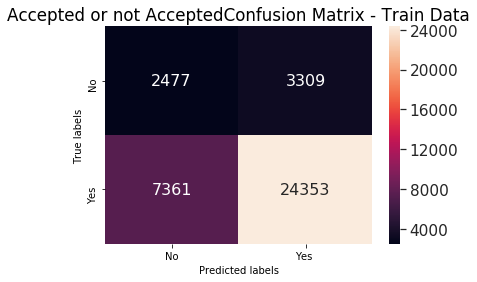

In [109]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [110]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24276441521323666 for threshold 0.848
[[1128  800]
 [4501 6071]]


the maximum value of tpr*(1-fpr) 0.24276441521323666 for threshold 0.848


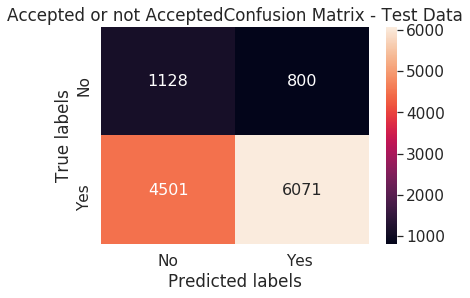

In [111]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

### 8.1.3 Find all the FALSE POSITIVES to see what is wrong with the model and plotting WORDCLOUD

In [127]:
#https://stackoverflow.com/questions/35391086/python-how-to-solve-keyerror-2

y_test_new = list(y_test[::])

In [154]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
false_positives_index = []
false_positives_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_new[i] == 0 and y_test_scores[i] >= 0.848:
        false_positives_index.append(i)
        false_positives_count = false_positives_count + 1 
    else :
        continue


100%|██████████| 12500/12500 [00:00<00:00, 1389689.08it/s]

In [155]:
len(false_positives_index)

800

In [156]:
false_positives_count

800

In [185]:
bow_test.shape

(12500, 6323)

In [167]:
dfp = pd.DataFrame(bow_test)

In [175]:
data = X_test.iloc[false_positives_index,:]

In [191]:
data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25054       28846  p173713  7ebdeb4f538d8378034205b9a174633f            Ms.   
11505      163764  p237858  0b7e44a93de8efebecf5017d7a3794bf            Ms.   
26482       87763  p176014  980737d08ea3b2e564d2978c80032949            Ms.   
43051      114048  p095228  cb7ec4ce0be2026abd554e39c03bdcad            Ms.   
25182      117651  p054039  b25d4b164cb3ec455cb31347e1d5fc96           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25054           OR        2016-09-13 00:34:20            Grades 9-12   
11505           CA        2016-08-31 17:39:56             Grades 3-5   
26482           IL        2016-11-14 11:23:57          Grades PreK-2   
43051           MS        2016-09-10 18:30:59             Grades 3-5   
25182           MN        2016-09-07 14:44:23             Grades 3-5   

                                         project_essay_1  \
25054  My students are in the top of their class and ...   
11505  Each of my students is unique and special in t...   
26482  My 25 students are full day kindergarteners in...   
43051  I teach all 4th graders language arts, Math, S...   
25182  I have the greatest students this year! I am s...   

                                         project_essay_2 project_essay_3  ...  \
25054  Since we don't have a physical textbook to use...             NaN  ...   
11505  These hands on math manipulatives will help my...             NaN  ...   
26482  Although we do have school supply list, often ...             NaN  ...   
43051  The materials in this project will allow stude...             NaN  ...   
25182  I have been looking for new ways to expose stu...             NaN  ...   

      teacher_number_of_previously_posted_projects project_is_approved  \
25054                                            5                   0   
11505                                            8                   0   
26482                                            5                   0   
43051                                            1                   0   
25182                                            2                   0   

                clean_categories       clean_subcategories  \
25054               Math_Science           AppliedSciences   
11505  Math_Science SpecialNeeds  Mathematics SpecialNeeds   
26482          Literacy_Language                  Literacy   
43051               Math_Science           AppliedSciences   
25182          Literacy_Language                  Literacy   

                                      preprocessed_essay  \
25054  my students top class i would love help suppor...   
11505  each students unique special way i teach speci...   
26482  my 25 students full day kindergarteners high p...   
43051  i teach 4th graders language arts math science...   
25182  i greatest students year i excited small class...   

                  preprocessed_project_title   price quantity  \
25054  interactive science notebook supplies  125.28       19   
11505                marvelous mathmaticians  710.84       24   
26482                 school center supplies  247.99       18   
43051   easel ly learning with anchor charts  169.12        3   
25182       e books a new generation reading  289.96        4   

       essay_word_count  Title_word_count  
25054               104                 4  
11505               106                 2  
26482               127                 3  
43051               135                 6  
25182               112                 6  

[5 rows x 22 columns]

### 8.1.4 Now let’s print some wordclouds to have a glimpse at what kind of words apear in our Essay's of False Positive Data Points:

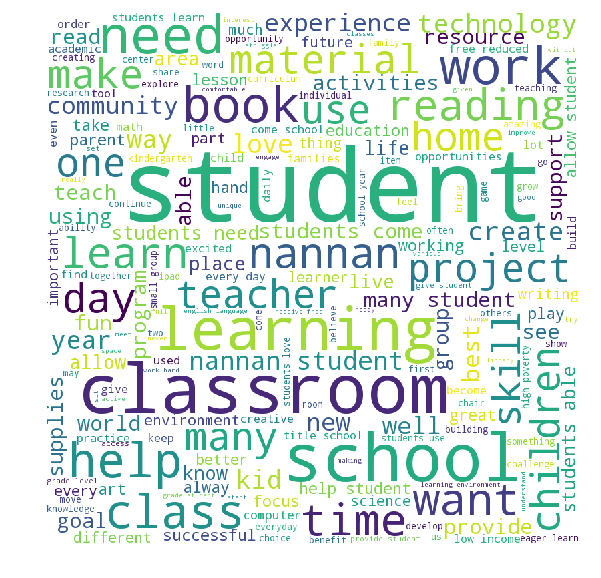

In [195]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data['preprocessed_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 8.1.5 Plot the box plot with the `price` of these `false positive data points`

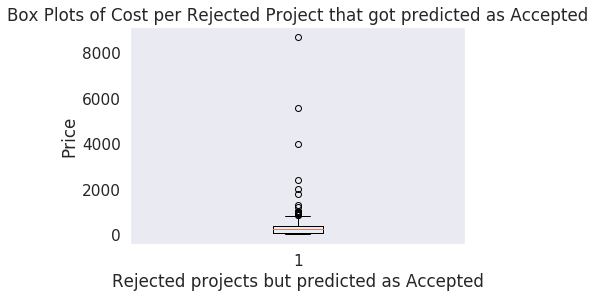

In [198]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(data['price'])
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

In [200]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", 'Rejected projects but predicted as Accepted']

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(data['price'],i), 3)])
print(x)

+------------+---------------------------------------------+
| Percentile | Rejected projects but predicted as Accepted |
+------------+---------------------------------------------+
|     0      |                     5.09                    |
|     5      |                    15.604                   |
|     10     |                    36.478                   |
|     15     |                    51.597                   |
|     20     |                    65.868                   |
|     25     |                    89.17                    |
|     30     |                   125.742                   |
|     35     |                   162.854                   |
|     40     |                   199.502                   |
|     45     |                   225.863                   |
|     50     |                   248.485                   |
|     55     |                   269.768                   |
|     60     |                   293.092                   |
|     65     |          

### Observations

1. 50% of Rejected projects but predicted as Accepted cost as much as $249

2. A Few of them are Extremely costly costing more than 2000 Dollars.

### 8.1.6 Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

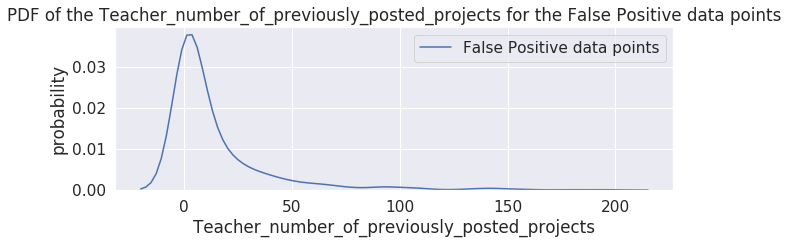

In [201]:
plt.figure(figsize=(10,3))
sns.distplot(data['teacher_number_of_previously_posted_projects'], hist=False, label="False Positive data points")
plt.title('PDF of the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

### Observations

Majority of the cases have Teachers with previously posted projects in rangea 0-5

## 8.2  Applying Logistic Regression on Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)

In [92]:
tfidf_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,essay_tfidf_train,project_title_tfidf_train))
tfidf_train=tfidf_train.tocsr()

In [93]:
tfidf_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,essay_tfidf_test,project_title_tfidf_test))

tfidf_test=tfidf_test.tocsr()

In [94]:
print("Final Shape of the Data matrix")
print(tfidf_train.shape, y_train.shape)

print(tfidf_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 6323) (37500,)
(12500, 6323) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value using GridSearchCV

-- Grid Parameter Search via 10-fold CV
{'max_depth': 10, 'min_samples_split': 500}


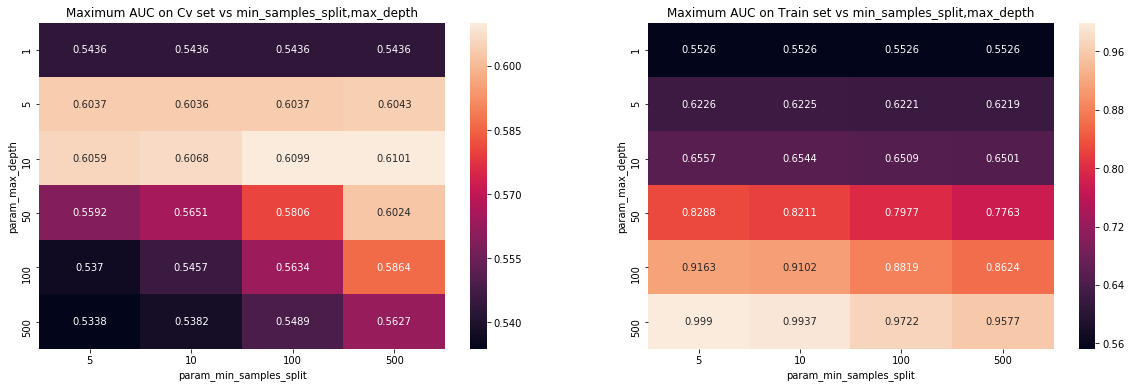

In [97]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              "min_samples_split": [5,10,100,500],
              "max_depth": [1, 5, 10, 50, 100, 500, 100]
              
              }

dt = DecisionTreeClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_train,y_train)

print(clf.best_params_)

train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 
                                    'param_max_depth','param_min_samples_split']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

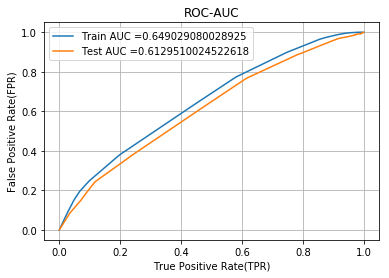

In [95]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(tfidf_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_train)[:,1]
y_test_scores= model.predict_proba(tfidf_test)[:,1]



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

#### With Class Balancing

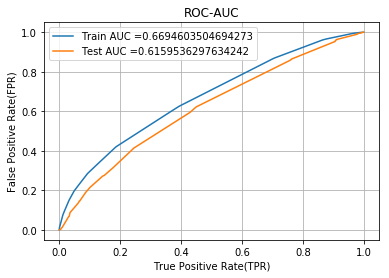

In [96]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')

model.fit(tfidf_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_train)[:,1]
y_test_scores= model.predict_proba(tfidf_test)[:,1]




train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### 8.2.1 Visualize Decision Trees


In [102]:
features_names = []
features_names.append("price")
features_names.append("prev_proposed_projects")



    
for a in feature_Project_Categories :
    features_names.append(a)
    
for a in feature_Project_sub_Categories :
    features_names.append(a)
    
for a in feature_schol_state :
    features_names.append(a)
    
for a in feature_project_grade :
    features_names.append(a)

for a in feature_teacher_prefix :
    features_names.append(a)
    
for a in feature_tfidf_essay :
    features_names.append(a)

for a in feature_tfidf_project_title :
    features_names.append(a)

In [103]:
len(features_names)


6323

In [104]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(tfidf_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

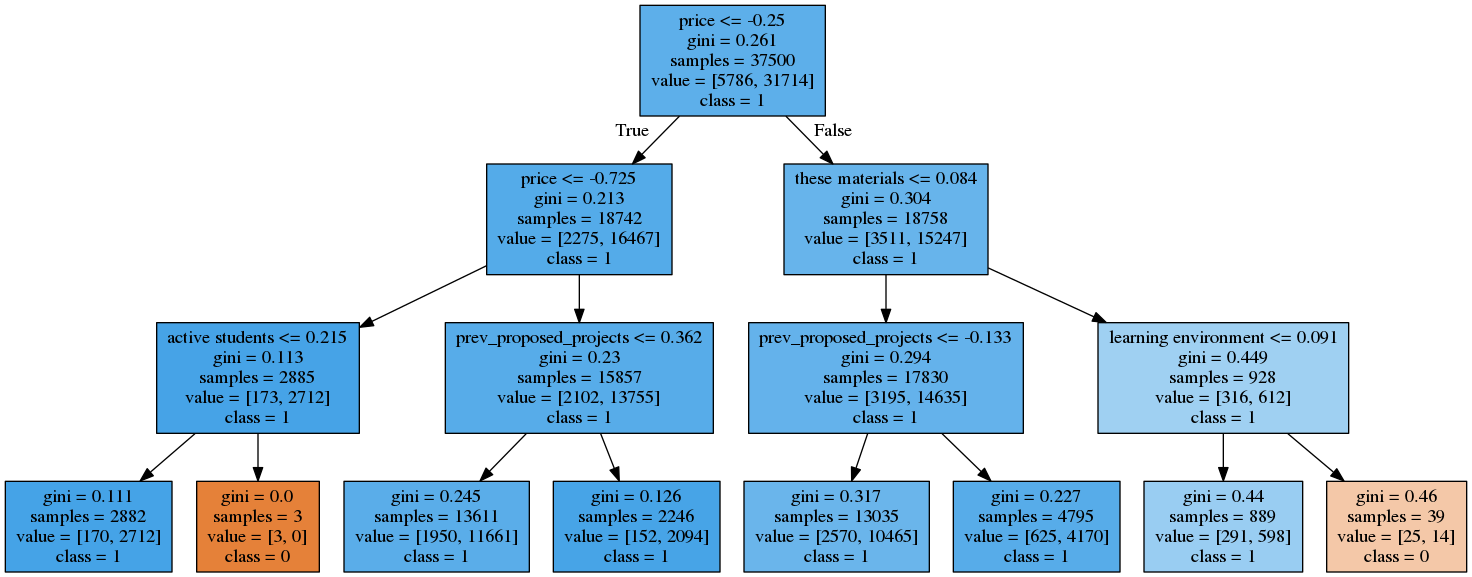

In [105]:
##https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=features_names, class_names=['0', '1'] 
   , filled = True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
#display(SVG(graph.pipe(format='svg')))


### c) Confusion Matrix

#### Train Data

In [160]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24750518224079032 for threshold 0.85
[[ 3182  2604]
 [11321 20393]]


the maximum value of tpr*(1-fpr) 0.24750518224079032 for threshold 0.85


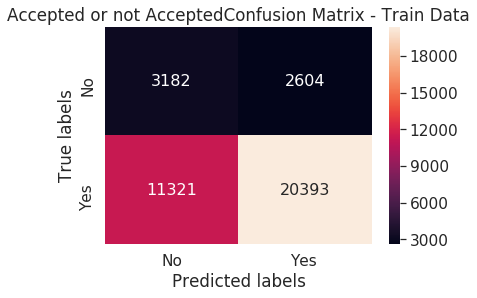

In [161]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [162]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24988136180506532 for threshold 0.85
[[ 985  943]
 [3874 6698]]


the maximum value of tpr*(1-fpr) 0.24988136180506532 for threshold 0.85


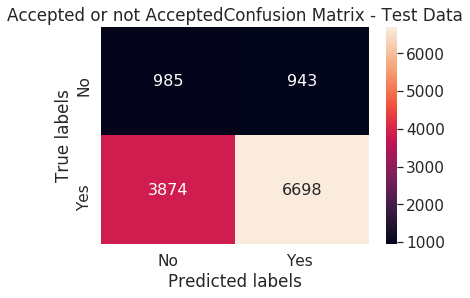

In [163]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

### 8.2.2 Find all the FALSE POSITIVES to see what is wrong with the model and plotting WORDCLOUD

In [164]:
#https://stackoverflow.com/questions/35391086/python-how-to-solve-keyerror-2

y_test_new = list(y_test[::])

In [165]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
false_positives_index = []
false_positives_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_new[i] == 0 and y_test_scores[i] >= 0.85:
        false_positives_index.append(i)
        false_positives_count = false_positives_count + 1 
    else :
        continue

100%|██████████| 12500/12500 [00:00<00:00, 1738701.33it/s]


In [166]:
len(false_positives_index)

943

In [172]:
dfp = pd.DataFrame(bow_test)

In [173]:
data = X_test.iloc[false_positives_index,:]

In [174]:
data.head(5)


Unnamed: 0       id                        teacher_id teacher_prefix  \
25054       28846  p173713  7ebdeb4f538d8378034205b9a174633f            Ms.   
3731        46625  p110578  3fc2c03217f8e6ef03a8b8b97e3efdb2           Mrs.   
11505      163764  p237858  0b7e44a93de8efebecf5017d7a3794bf            Ms.   
43051      114048  p095228  cb7ec4ce0be2026abd554e39c03bdcad            Ms.   
30494       68684  p049572  dad6800f4dc40658ab83c3453ad6627c            Ms.   

      school_state project_submitted_datetime project_grade_category  \
25054           OR        2016-09-13 00:34:20            Grades 9-12   
3731            IL        2016-09-03 12:06:10             Grades 6-8   
11505           CA        2016-08-31 17:39:56             Grades 3-5   
43051           MS        2016-09-10 18:30:59             Grades 3-5   
30494           MD        2016-10-31 00:44:01             Grades 6-8   

                                         project_essay_1  \
25054  My students are in the top of their class and ...   
3731   Imagine you are in a class with thirty kids in...   
11505  Each of my students is unique and special in t...   
43051  I teach all 4th graders language arts, Math, S...   
30494  I grew up in Alabama but I now teach in Maryla...   

                                         project_essay_2 project_essay_3  ...  \
25054  Since we don't have a physical textbook to use...             NaN  ...   
3731   My students are an incredibly diverse group wi...             NaN  ...   
11505  These hands on math manipulatives will help my...             NaN  ...   
43051  The materials in this project will allow stude...             NaN  ...   
30494  We are constantly exploring a wide range of li...             NaN  ...   

      teacher_number_of_previously_posted_projects project_is_approved  \
25054                                            5                   0   
3731                                             0                   0   
11505                                            8                   0   
43051                                            1                   0   
30494                                            0                   0   

                        clean_categories  \
25054                       Math_Science   
3731        AppliedLearning Math_Science   
11505          Math_Science SpecialNeeds   
43051                       Math_Science   
30494  AppliedLearning Literacy_Language   

                         clean_subcategories  \
25054                        AppliedSciences   
3731          College_CareerPrep Mathematics   
11505               Mathematics SpecialNeeds   
43051                        AppliedSciences   
30494  College_CareerPrep Literature_Writing   

                                      preprocessed_essay  \
25054  my students top class i would love help suppor...   
3731   imagine class thirty kids 6th grade the person...   
11505  each students unique special way i teach speci...   
43051  i teach 4th graders language arts math science...   
30494  i grew alabama i teach maryland in years learn...   

                     preprocessed_project_title quantity   price  \
25054     interactive science notebook supplies       19  125.28   
3731   help us reach our goals using technology       10  149.99   
11505                   marvelous mathmaticians       24  710.84   
43051      easel ly learning with anchor charts        3  169.12   
30494                   elroy jetson is my hero        4  159.43   

       essay_word_count  Title_word_count  
25054               104                 4  
3731                125                 7  
11505               106                 2  
43051               135                 6  
30494               214                 5  

[5 rows x 22 columns]

### 8.2.3  Now let’s print some wordclouds to have a glimpse at what kind of words apear in our Essay's of False Positive Data Points    

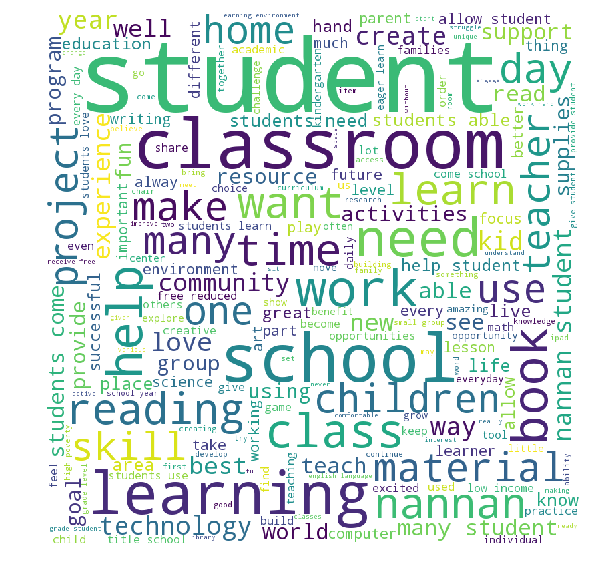

In [211]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data['preprocessed_essay']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


###  8.2.4 Plot the box plot with the price of these false positive data points


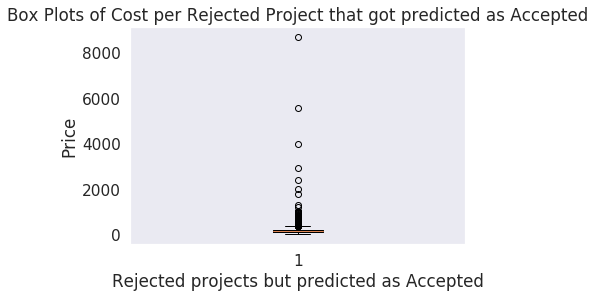

In [175]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot(data['price'])
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

In [176]:
##http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", 'Rejected projects but predicted as Accepted']

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(data['price'],i), 3)])
print(x)

+------------+---------------------------------------------+
| Percentile | Rejected projects but predicted as Accepted |
+------------+---------------------------------------------+
|     0      |                     4.99                    |
|     5      |                    18.491                   |
|     10     |                    42.152                   |
|     15     |                    57.621                   |
|     20     |                    74.68                    |
|     25     |                    91.13                    |
|     30     |                   101.728                   |
|     35     |                   110.461                   |
|     40     |                   122.104                   |
|     45     |                   135.651                   |
|     50     |                    147.95                   |
|     55     |                   155.051                   |
|     60     |                    167.35                   |
|     65     |          

### Observations

1.  50% of Rejected projects but predicted as Accepted cost as much as $147


2.  A very Few of them are Extremely costly costing more than 2000 Dollars.

### Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points


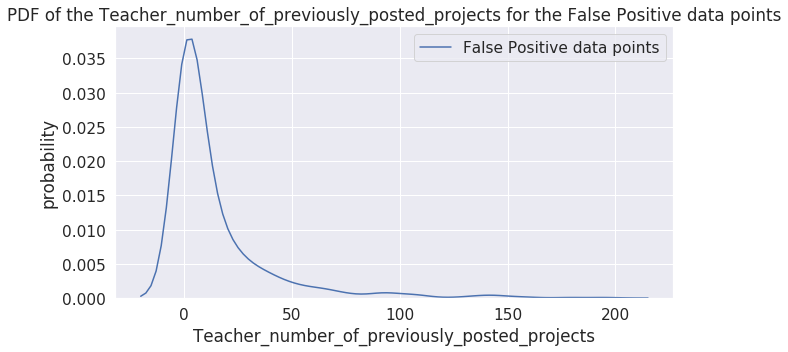

In [215]:
plt.figure(figsize=(10,5))
sns.distplot(data['teacher_number_of_previously_posted_projects'], hist=False, label="False Positive data points")
plt.title('PDF of the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()


### Observations:

Majority of the cases have Teachers with previously posted projects in rangea 0-5



##  8.3 Applying Logistic Regression  on Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [97]:
w2v_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,sent_vectors_train,title_vectors_train))
w2v_train=w2v_train.tocsr()

In [98]:
w2v_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,sent_vectors_test,title_vectors_test))
w2v_test=w2v_test.tocsr()

In [99]:
print("Final Shape of the Data matrix")
print(w2v_train.shape, y_train.shape)

print(w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 701) (37500,)
(12500, 701) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 10-fold CV
{'max_depth': 5, 'min_samples_split': 100}


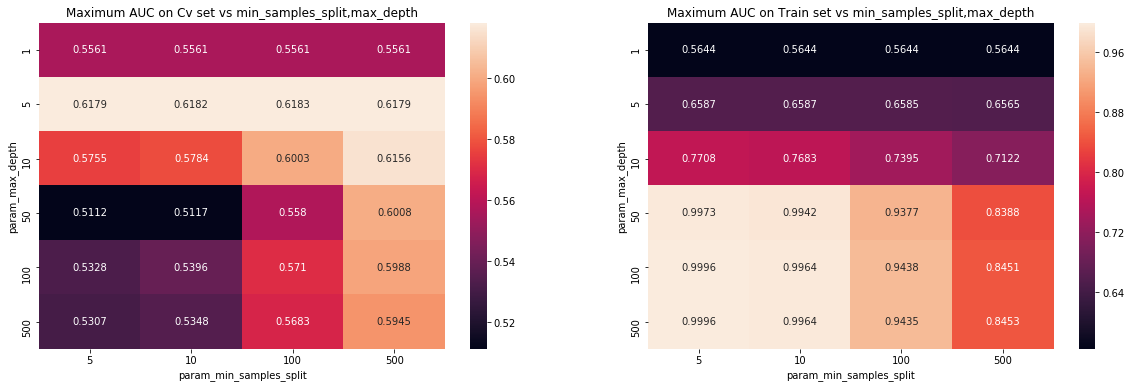

In [101]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {
              "min_samples_split": [5,10,100,500],
              "max_depth": [1, 5, 10, 50, 100, 500, 100]
              
              }

dt = DecisionTreeClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(w2v_train,y_train)

print(clf.best_params_)

train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 
                                    'param_max_depth','param_min_samples_split']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

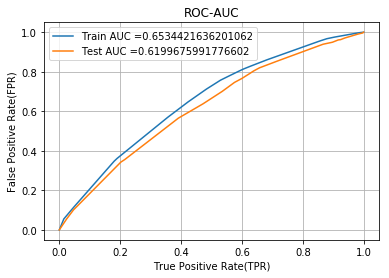

In [102]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 100)

model.fit(w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(w2v_train)[:,1]
y_test_scores= model.predict_proba(w2v_test)[:,1]




train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

#### With Class Balancing

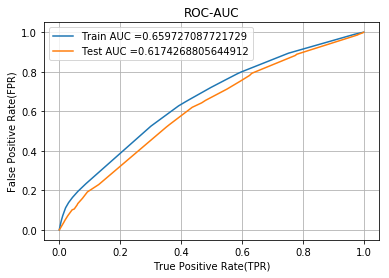

In [101]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 100,class_weight = 'balanced')

model.fit(w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(w2v_train)[:,1]
y_test_scores= model.predict_proba(w2v_test)[:,1]




train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [105]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497247130605611 for threshold 0.855
[[ 2989  2797]
 [ 9121 22593]]


the maximum value of tpr*(1-fpr) 0.2497247130605611 for threshold 0.855


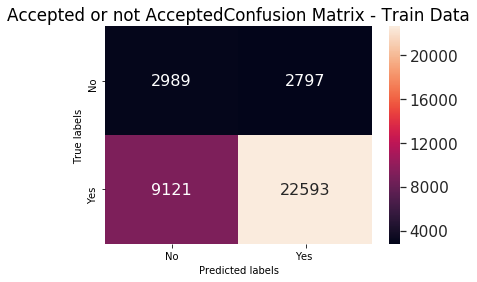

In [106]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [107]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24924432043181075 for threshold 0.865
[[1017  911]
 [3825 6747]]


the maximum value of tpr*(1-fpr) 0.24924432043181075 for threshold 0.865


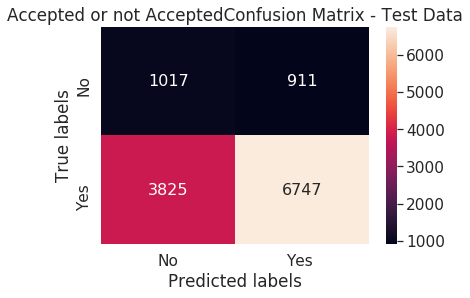

In [108]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 8.4  Applying Logistic Regression on Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)


In [109]:
tfidf_w2v_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,tfidf_w2v_essay_train,tfidf_w2v_title_train))
tfidf_w2v_train=tfidf_w2v_train.tocsr()

In [110]:
tfidf_w2v_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,tfidf_w2v_essay_test,tfidf_w2v_title_test))
tfidf_w2v_test=tfidf_w2v_test.tocsr()

In [111]:
print("Final Shape of the Data matrix")
print(tfidf_w2v_train.shape, y_train.shape)

print(tfidf_w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 701) (37500,)
(12500, 701) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 10-fold CV
{'max_depth': 10, 'min_samples_split': 500}


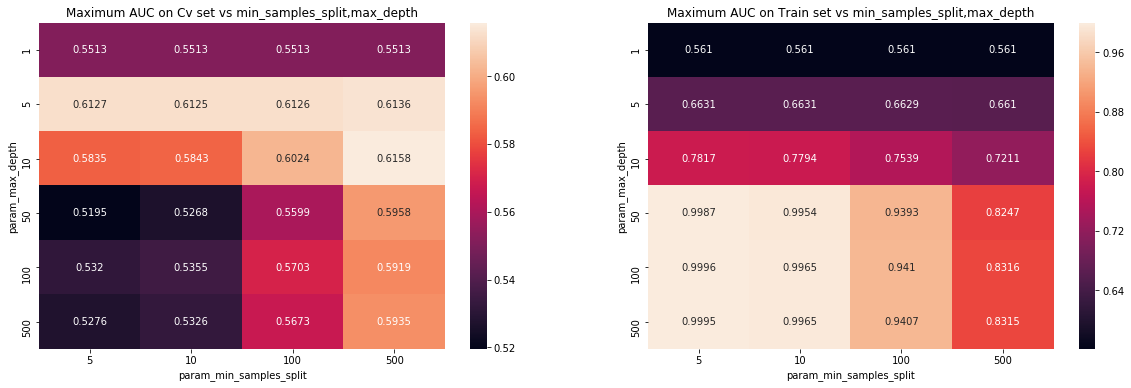

In [109]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {
              "min_samples_split": [5,10,100,500],
              "max_depth": [1, 5, 10, 50, 100, 500, 100]
              
              }

dt = DecisionTreeClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_w2v_train,y_train)

print(clf.best_params_)

train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 
                                    'param_max_depth','param_min_samples_split']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

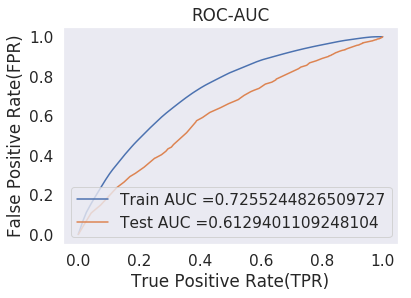

In [114]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(tfidf_w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_w2v_train)[:,1]
y_test_scores= model.predict_proba(tfidf_w2v_test)[:,1]




train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

#### With Class Balancing

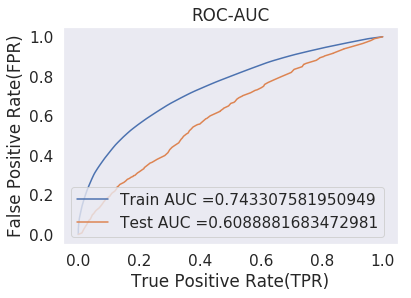

In [113]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500, class_weight = 'balanced' )

model.fit(tfidf_w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_w2v_train)[:,1]
y_test_scores= model.predict_proba(tfidf_w2v_test)[:,1]




train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [115]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999569864157128 for threshold 0.8
[[ 2905  2881]
 [ 5776 25938]]


the maximum value of tpr*(1-fpr) 0.24999569864157128 for threshold 0.8


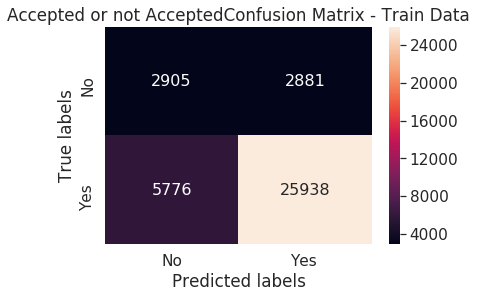

In [116]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [117]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24996126099757235 for threshold 0.864
[[ 976  952]
 [3579 6993]]


the maximum value of tpr*(1-fpr) 0.24996126099757235 for threshold 0.864


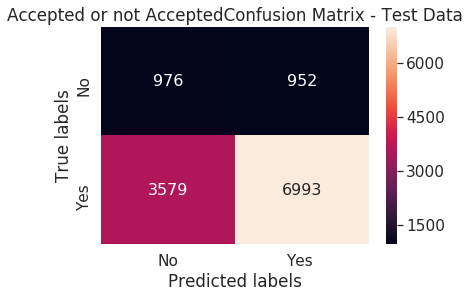

In [118]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

# Task-2

## 8.5  Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM)

In [87]:
features_names = []
features_names.append("price")
features_names.append("prev_proposed_projects")



    
for a in feature_Project_Categories :
    features_names.append(a)
    
for a in feature_Project_sub_Categories :
    features_names.append(a)
    
for a in feature_schol_state :
    features_names.append(a)
    
for a in feature_project_grade :
    features_names.append(a)

for a in feature_teacher_prefix :
    features_names.append(a)
    
for a in feature_tfidf_essay :
    features_names.append(a)

for a in feature_tfidf_project_title :
    features_names.append(a)

In [88]:
len(features_names)

6323

1. A trained DecisionTreeClassifier model automatically calculates feature importance on your predictive modeling problem.These importance scores are available in the feature_importances_ member variable of the trained model.

2. Feature importance scores can be used for feature selection in scikit-learn.

In [89]:
tfidf_train


<37500x6323 sparse matrix of type '<class 'numpy.float64'>'
	with 1882086 stored elements in Compressed Sparse Row format>

#### Populate a Pandas SparseDataFrame from a SciPy Sparse Matrix


In [90]:
1. 

1.0

In [91]:
tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=features_names)

In [92]:
tfidf_df_test = pd.DataFrame(tfidf_test.toarray(), columns=features_names)

In [93]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(tfidf_df,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Creating a dictionary with all the feature names and their corresponding feature importance scores

In [94]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features
feature_imp_dict = dict(zip(features_names, clf.feature_importances_))

#### Sorting dictionary in descending order and selecting top 5000 features names

In [95]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039

sorted_cat_dict = dict(sorted(feature_imp_dict.items(), key=lambda kv: kv[1],reverse=True)[:5000])


#dict(sorted(data.items(), key=lambda x: x[1]['score'], reverse=True)[:2])


#### Get top n key's with Value as dictionary

#### return dictionary keys as a list in Python

In [96]:
important_feature=[]

for key in sorted_cat_dict.keys():
    important_feature.append(key)

In [104]:
len(important_feature)

5000

#### Selecting multiple columns in a pandas dataframe


In [98]:
tfidf_df_imp=tfidf_df.loc[:, important_feature] 

In [99]:
tfidf_df_imp.shape

(37500, 5427)

In [100]:
# I have accidentally create a duplicate column with the same name. Remove duplicate columns like so:

tfidf_df_imp = tfidf_df_imp.loc[:,~tfidf_df_imp.columns.duplicated()]

In [101]:
tfidf_df_imp.shape

(37500, 5000)

This is our Final Data Frame with Top 5000 Features Selected using `feature_importances_`

In [102]:
tfidf_df_imp_test=tfidf_df_test.loc[:, important_feature] 
tfidf_df_imp_test = tfidf_df_imp_test.loc[:,~tfidf_df_imp_test.columns.duplicated()]

In [103]:
tfidf_df_imp_test.shape

(12500, 5000)

### A. Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 7/7 [00:00<00:00, 11104.44it/s]


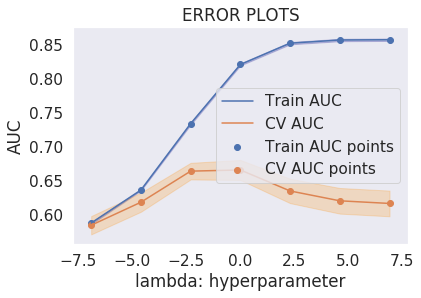

In [153]:

# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(lr, param_grid, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(tfidf_df_imp ,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

# let us try taking log of c values so that our plot makes more sense
log_lambda=[]
o_lambda = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for a in tqdm(o_lambda):
    b = math.log(a)
    log_lambda.append(b) 

plt.plot(log_lambda, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_lambda,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_lambda, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_lambda,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_lambda, train_auc, label='Train AUC points')
plt.scatter(log_lambda, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show() 

In [154]:
print(param_grid['C'])    
print(cv_auc)

[0.001, 0.01, 0.1, 1, 10, 100, 1000]
[0.58394782 0.61785214 0.66362166 0.66535054 0.63445294 0.61993086
 0.61605373]


In [155]:
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1}


### B] Train model using the best hyper-parameter value

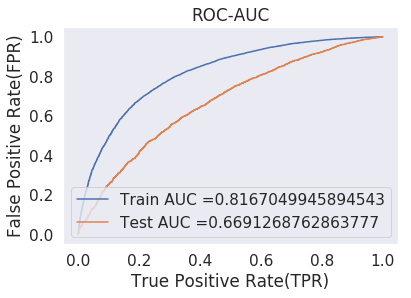

In [147]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = 1)

model.fit(tfidf_df_imp ,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_df_imp)[:,1]
y_test_scores= model.predict_proba(tfidf_df_imp_test)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_scores)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

In [148]:
y_test_scores.shape

(12500,)

In [149]:
train_thresholds.shape

(7649,)

In [150]:
train_tpr.shape

(7649,)

In [151]:
train_fpr.shape

(7649,)

In [152]:
train_thresholds

array([1.99966371, 0.99966371, 0.99418912, ..., 0.16176042, 0.1283201 ,
       0.08362311])

In [153]:
train_tpr

array([0.00000000e+00, 3.15318156e-05, 2.36488617e-03, ...,
       9.99936936e-01, 1.00000000e+00, 1.00000000e+00])

In [154]:
train_fpr

array([0.        , 0.        , 0.        , ..., 0.99982717, 0.99982717,
       1.        ])

In [155]:
#convert all of the items in a list to floats
new_list = [float(i) for i in train_fpr]

In [156]:
len(new_list)

7649

In [120]:
#List to array conversion

myarray = np.asarray(new_list)

In [121]:
myarray.shape

(7649,)

In [122]:
test_fpr

array([0.        , 0.        , 0.        , ..., 0.99948133, 1.        ,
       1.        ])

### C) Confusion Matrix

#### Train Data

In [157]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_thresholds, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.753
[[ 2893  2893]
 [ 3190 28524]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.753


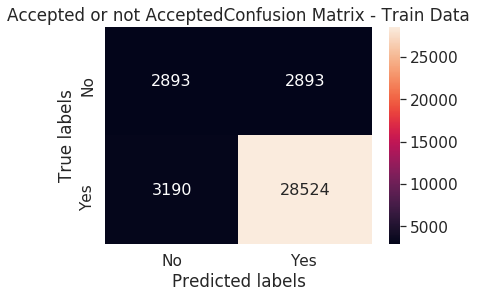

In [158]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_thresholds, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [131]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_thresholds, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.818
[[ 964  964]
 [2801 7771]]


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.818


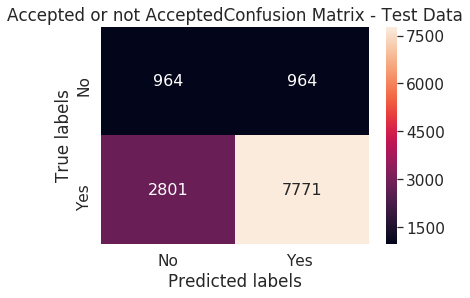

In [130]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_thresholds, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

### Visualize Decision Trees


In [ ]:
len(important_feature)

In [144]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(tfidf_df_imp ,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

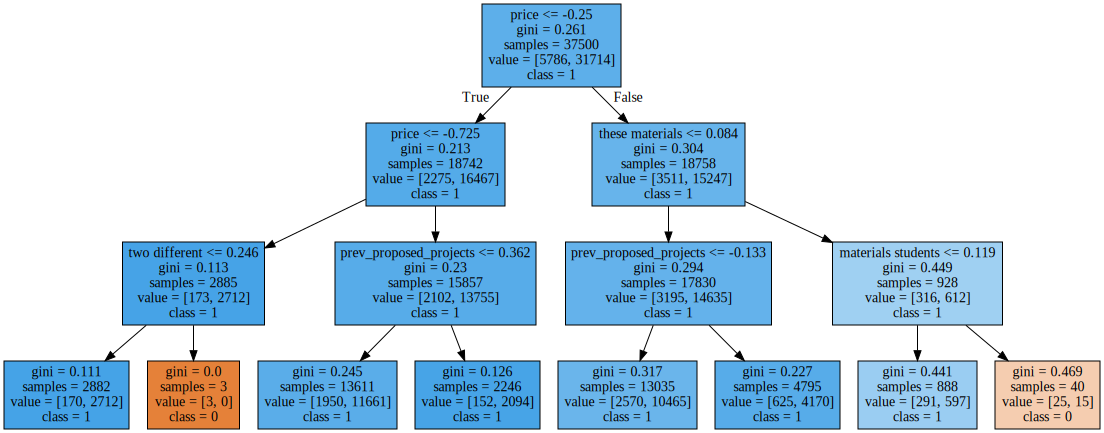

In [145]:
##https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=important_feature, class_names=['0', '1'] 
   , filled = True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
#display(SVG(graph.pipe(format='svg')))


### Obseravtions

In [2]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Trees","(10, 500)", 0.65, 0.61])
x.add_row(["BOW with class balancing", "Decision Trees","(10, 500)", 0.66, 0.61])
x.add_row(["TFIDF", "Decision Trees", "(10, 100)", 0.64, 0.61])
x.add_row(["TFIDF with class balancing", "Decision Trees","(10, 500)", 0.66, 0.61])
x.add_row(["AVG W2V", "Decision Trees", "(10, 100)", 0.65, 0.61])
x.add_row(["AVG W2V with class balancing", "Decision Trees","(10, 500)", 0.65, 0.61])
x.add_row(["TFIDF W2V", "Decision Trees", "(10, 500)", 0.725, 0.612])
x.add_row(["TFIDF W2V with class balancing", "Decision Trees", "(10, 500)", 0.74, 0.60])
x.add_row(["TFIDF-5k Features", "Logistic Regression", "[c = 1]", 0.81, 0.66])

print(x)

+--------------------------------+---------------------+----------------------------------------------+-----------+----------+
|           Vectorizer           |        Model        | Hyperparameters(max depth,min samples split) | Train AUC | Test AUC |
+--------------------------------+---------------------+----------------------------------------------+-----------+----------+
|              BOW               |    Decision Trees   |                  (10, 500)                   |    0.65   |   0.61   |
|    BOW with class balancing    |    Decision Trees   |                  (10, 500)                   |    0.66   |   0.61   |
|             TFIDF              |    Decision Trees   |                  (10, 100)                   |    0.64   |   0.61   |
|   TFIDF with class balancing   |    Decision Trees   |                  (10, 500)                   |    0.66   |   0.61   |
|            AVG W2V             |    Decision Trees   |                  (10, 100)                   |    0.65

### Conclusions

1. When data(n) is large and dimension(d) is small , Decision Tree is your choice


2. As depth increases --> OVERFITTING As depth decreases --> UNDERFITTING

3. Looks like our Decision Tree model is giving same performance on different type of vectorizer's

4. Doing Class Balancing also didnt help in improving our model Performance.

4. But When we used decision trees Feature_importance to select top 5000 features and trained our Logistic Regression Model on those features. we noticed that there is a significant increase in Performnace.

### Steps Followed

1. I took 50000 datapoints for my analysis and building my model
2. I splitted the dataset into train, cv and test dataset
3. Preprocessed all the text fetaures
4. Vectorized all the text, categorical and numerical features, for text i used BOW , TFIDF,W2V and TFIDFW2v
5. Merged all features using hstack
6. Using train dataset, i found best Hyperparameter a.Minimum sample split and b. Maximum Depth using GridSearchCV using 3Fold Cross Validation for all categories.
7. i picked best best Hyperparameter. using best Hyperparameter, i plotted ROC curve on train and test data.
8. Then i plotted my confusion matrix for both the sets.
9. For My Feature set1 and set2 I also Analyzed the False Positives of Test set by
   1. Building a wordclouds to have a glimpse at what kind of words apear in our Essay's of False Positive Data Points
   2.Plot the box plot with the price of these false positive data points
   3. Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
10. I also used Graphviz to see visualization of Decision Tree on SET1 and SET2
11. I also picked top 5k features based on their feature importance and applied logistic regression model on these top features.
12. Atlast you can see my result in tabular format.